## Setup
* This project requires Python 3.7 or above
* requires Scikit-Learn ≥ 1.0.1:
* Define the default font sizes to make the figures prettier(font-14, axes-14,legend-14, xtick-10, ytick-10)
* create the images/unsupervised_learning folder (if it doesn't already exist), and define the save_fig()

In [6]:
import sys
from packaging import version
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
assert sys.version_info >= (3,7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

plt.rc("font", size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [8]:
IMAGE_PATH = Path()/"images"/"unsupervised_learning"
IMAGE_PATH.mkdir(parents = True, exist_ok=True)
def save_fig(fig_id, resolution=300, tight_layout=True, file_extension='png'):
    image_path = IMAGE_PATH/f"{fig_id}.{file_extension}"
    print(f"{fig_id} is saving...")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path, dpi=resolution, format=file_extension)

    

## Clusting
### Classification vs clusting

In [9]:
from sklearn.datasets import load_iris

In [10]:
data = load_iris()
X = data.data
y = data.target
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
X.shape, y.shape

((150, 4), (150,))

classification_vs_clustering_plot is saving...


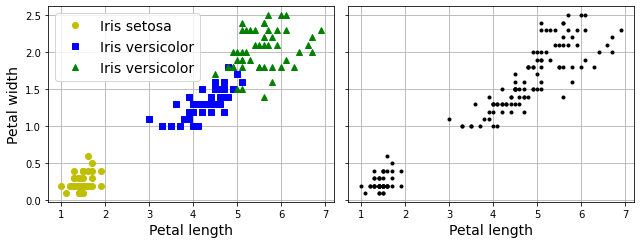

In [12]:
# X[:,2:4]petal length, petal width
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2],X[y==0, 3],'yo', label='Iris setosa')
plt.plot(X[y==1, 2],X[y==1, 3],'bs', label='Iris versicolor')
plt.plot(X[y==2, 2],X[y==2, 3],'g^', label='Iris versicolor')
plt.grid()
plt.legend(loc='upper left')
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.subplot(122)
plt.scatter(X[:, 2],X[:, 3],color='k', marker='.')
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
plt.xlabel("Petal length")

save_fig("classification_vs_clustering_plot")
plt.show()

In [13]:
# Show how gaussian mixture can actually identify these clusters pretty well using all 4 features, petal width&length,
# sepal width&length. This code maps each cluster to a class.Instead of hard coding the mapping, the code picks 
# the most common class for each clusetr using scipy.stats.mode() 

from sklearn.mixture import GaussianMixture
from scipy import stats
import numpy as np

In [14]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [15]:
mapping ={}
for class_id in np.unique(y):
    mode,_ = stats.mode(y_pred[y==class_id], keepdims=True) #to find what y correlated label is in y_pred
    print(mode[0])
    mapping[mode[0]] =class_id  #key:value=y_pred:y

# rename the y_pred
y_pred = np.array([mapping[class_id] for class_id in y_pred])


1
2
0


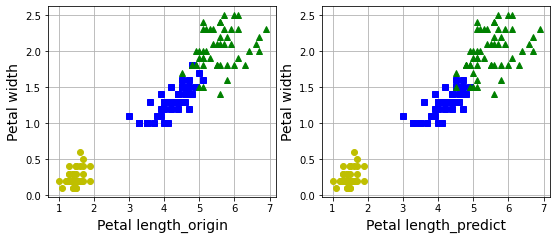

In [16]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2],X[y==0, 3],'yo', label='Iris setosa')
plt.plot(X[y==1, 2],X[y==1, 3],'bs', label='Iris versicolor')
plt.plot(X[y==2, 2],X[y==2, 3],'g^', label='Iris versicolor')
plt.grid()
# plt.legend(loc='upper left')
plt.xlabel("Petal length_origin")
plt.ylabel("Petal width")

plt.subplot(122)
plt.plot(X[y_pred==0, 2],X[y_pred==0, 3],'yo', label='Iris setosa')
plt.plot(X[y_pred==1, 2],X[y_pred==1, 3],'bs', label='Iris versicolor')
plt.plot(X[y_pred==2, 2],X[y_pred==2, 3],'g^', label='Iris versicolor')
plt.grid()

plt.xlabel("Petal length_predict")
plt.ylabel("Petal width")
plt.show()

In [19]:
(y_pred==y).sum()/len(y_pred)

0.9666666666666667

### K-Means
#### Fit and predict

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

In [21]:


# we train a K-means cluster on a dataset if blobs. we will find the centroid of each blob and assign the instance to its 
# closest blob

# define the centroid of blob
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples =2000, centers =blob_centers, cluster_std=blob_std, random_state=7)

K=5
kmeans = KMeans(n_clusters=5,random_state=42)
y_pred = kmeans.fit_predict(X)



In [22]:
def plot_blob(X,y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel(f'$X_1$')
    plt.ylabel(f'$X_2$', rotation=0)
               

blobs_plot is saving...


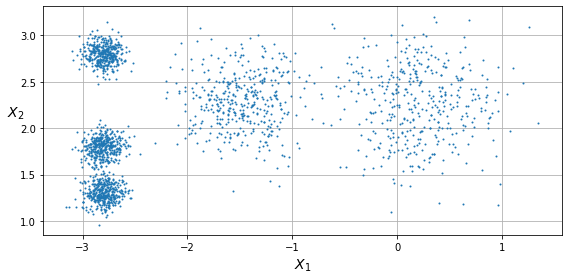

In [23]:
plt.figure(figsize=(8,4))
plot_blob(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

In [24]:
# Each instance was assigned to 5 clusters
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [25]:
y_pred is kmeans.labels_

True

In [26]:
# The following 5 centroids(i.e. cluster centers) were estimated:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [27]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [28]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

#### Decision Boundaries
Let's plot the model's decision boundaries. This will give us a Voronoi diagram 

In [392]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1],'k.', markersize=2)
    
    
def plot_centroids(centroids, weight=None, circle_color='w', cross_color='k'):
    if weight is not None:
        centroids = centroids[weight > weight.max()/10]
    plt.scatter(centroids[:,0], centroids[:,1],marker='o', 
                s=35, color= circle_color,
                linewidth=8, alpha=0.9, zorder=10 )
    plt.scatter(centroids[:,0], centroids[:,1],marker='x',
                linewidth=12, color= cross_color,
                s=2, alpha=1, zorder=12)


def plot_decision_boundaries(clusters, X, resolution=1000,
                             show_centroids=True,
                             show_xlabel=True, show_ylabel=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    X_grids = np.c_[xx.ravel(),yy.ravel()]
    Z = clusters.predict(X_grids)
    Z = Z.reshape(xx.shape)
    
    # matplotlib.pyplot.contour() Function is used to plot contours lines wheras contourf draw filled contours
    plt.contourf(Z, extent=(mins[0],maxs[0], mins[1],  maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusters.cluster_centers_)
        
    if show_xlabel:
        plt.xlabel("$X_1$")
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabel:
        plt.ylabel("$X_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    


voronoi_plot is saving...


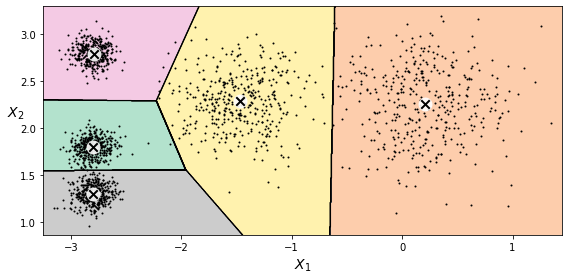

In [30]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
save_fig('voronoi_plot')
plt.show()

#### Hard clustering vs shoft clustering
kmeans.transform(X)- will return the distance(Euclidean distance between each instance and each centroids) of each instance to all centroids

In [31]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

In [32]:
np.argmin(kmeans.transform(X_new).round(2),axis=1)

array([1, 1, 2, 2], dtype=int64)

In [33]:
# to prove the Euclidean distances
print(X_new)
np.tile(X_new, (1,K))

[[ 0.   2. ]
 [ 3.   2. ]
 [-3.   3. ]
 [-3.   2.5]]


array([[ 0. ,  2. ,  0. ,  2. ,  0. ,  2. ,  0. ,  2. ,  0. ,  2. ],
       [ 3. ,  2. ,  3. ,  2. ,  3. ,  2. ,  3. ,  2. ,  3. ,  2. ],
       [-3. ,  3. , -3. ,  3. , -3. ,  3. , -3. ,  3. , -3. ,  3. ],
       [-3. ,  2.5, -3. ,  2.5, -3. ,  2.5, -3. ,  2.5, -3. ,  2.5]])

In [34]:
np.tile(X_new, (1,K)).reshape(-1,K,2)

array([[[ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ]],

       [[ 3. ,  2. ],
        [ 3. ,  2. ],
        [ 3. ,  2. ],
        [ 3. ,  2. ],
        [ 3. ,  2. ]],

       [[-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ]],

       [[-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5]]])

In [35]:
np.linalg.norm(np.tile(X_new,(1,K)).reshape(-1, K,2)- kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

#### K_Means algorithm
K_means is one of the fastest clustering algorithm, and also one of the simplest:
* First initialize *k* centroids randomly(we randomly select *k* distinct instances from data sets and place the centroid at the location
* repeat until convergence(i.e.  until centroids stop moving)
    * assign each instance to the closed centroid
    * update the centroids to be the mean of instances that are assigned to them 

The **computational complexity** is generally **linear** with regard to the number of instances $m$, the number of clusters $k$ and the number of the dimensions(features) $n$. However, this is only true when the data has a cluster structure. Otherwise, the worst-case scenario the complexity can increase exponentially with the number of instances m. In practices, this rarely happen. 

In [36]:
# Let's run the K-Means algorithm for 1,2,3 iterations, to see how the centroids move around
k_means_1= KMeans(n_clusters=5, n_init=1, max_iter=1, init='random', random_state=5)
k_means_2 = KMeans(n_clusters=5, n_init=1, max_iter=2, init='random', random_state=5)
k_means_3 = KMeans(n_clusters=5, n_init=1, max_iter=3, init='random', random_state=5)

k_means_1.fit(X)
k_means_2.fit(X)
k_means_3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=5)

kmeans_algorithm_plot is saving...


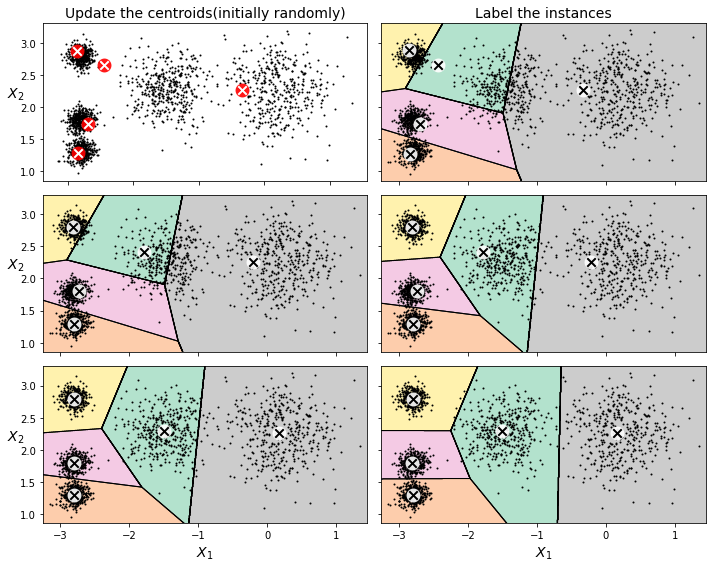

In [37]:
plt.figure(figsize=(10,8))
plt.subplot(321)
plot_data(X)
plot_centroids(k_means_1.cluster_centers_, circle_color='r', cross_color='w')
plt.tick_params(labelbottom=False)
plt.ylabel(f"$X_2$", rotation=0)
plt.title('Update the centroids(initially randomly)')

plt.subplot(322)
plot_decision_boundaries(k_means_1, X, show_xlabel=False, show_ylabel=False )
plt.title('Label the instances')

plt.subplot(323)
plot_decision_boundaries(k_means_1, X, show_xlabel=False, show_ylabel=True, show_centroids=False)
plot_centroids(k_means_2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(k_means_2, X, show_xlabel=False, show_ylabel=False )

plt.subplot(325)
plot_decision_boundaries(k_means_2, X, show_centroids=False)
plot_centroids(k_means_3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(k_means_3, X,  show_ylabel=False )

save_fig("kmeans_algorithm_plot")
plt.show()

##### K_Means variability(why need multiple initialization)
In the original K_Means algorithm, the centroids are just set randomly,and the algorithm simply runs a singly initial to gradually improve the centroids, as we saw above.

However, one major problems with this approach is that you run K_Means multiple times(or with different random seeds), it can converge to different solutions


In [38]:
def plot_clusterer_comparison(cluster1, cluster2, X, title1, title2):
    
    cluster1.fit(X)
    cluster2.fit(X)
    plt.figure(figsize=(10,3.2))
    plt.subplot(121)
    plot_decision_boundaries(cluster1, X)
    if title1:   
        plt.title(title1)
        
    plt.subplot(122)
    plot_decision_boundaries(cluster2, X, show_ylabel=False)
    if title2:
        plt.title(title2)

        

kmeans_variability_plot is saving...


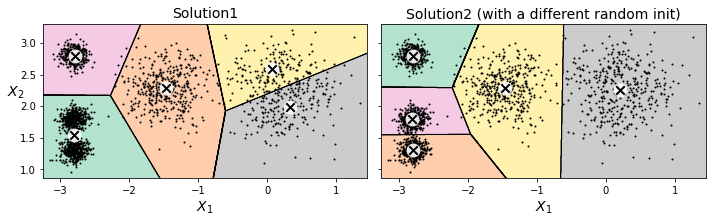

In [39]:
k_means_11= KMeans(n_clusters=5, n_init=1, random_state=2, init="random",)
k_means_22= KMeans(n_clusters=5, n_init=1, random_state=10, init="random")

plot_clusterer_comparison(k_means_11, k_means_22, X, 'Solution1', 'Solution2 (with a different random init)')

save_fig("kmeans_variability_plot")
plt.show()


In [40]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
k_means_good = KMeans(n_clusters=5, init=good_init,n_init =1, random_state=42)
k_means_good.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

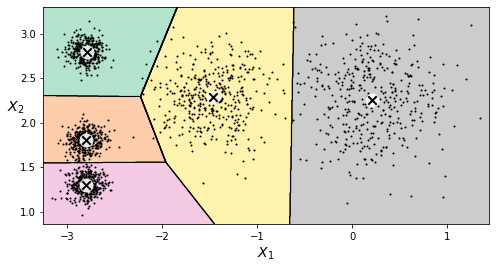

In [41]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(k_means_good, X)

##### Inertia
inertia: the distances between each instance and its centroid

In [42]:
k_means_1.inertia_, k_means_2.inertia_, k_means_3.inertia_

(599.4448496397234, 320.60236842486245, 212.90712694172603)

In [43]:
k_means_good.inertia_

211.5985372581684

In [44]:
# to prove inertia is the sum of squared distances between each training instance and its closest centroid
X_dist = k_means_good.transform(X)

In [45]:
X_dist.shape

(2000, 5)

In [46]:
np.arange(len(X_dist)), k_means_good.labels_  #identify the distance between each instances and their closest 

(array([   0,    1,    2, ..., 1997, 1998, 1999]),
 array([2, 1, 4, ..., 0, 4, 1]))

In [47]:
sum(X_dist[np.arange(len(X_dist)), k_means_good.labels_]**2)  #identify the distance between each instances and their closest 

211.59853725816828

In [48]:
# The score() method returns the negative inertia as predictors in sklearn must always respect 'the great is better'rule
k_means_good.score(X)

-211.5985372581684

##### Multiple Initialization(n_init=)
One approach to solve the variability issue is to simply run K-Means multiple times with different random initializations, and select the solutions that minimize the initial
* **n_init**: sklearn runs the original algorithm n_init times and select the solution that with minimize inertial. By default, n_init is 10

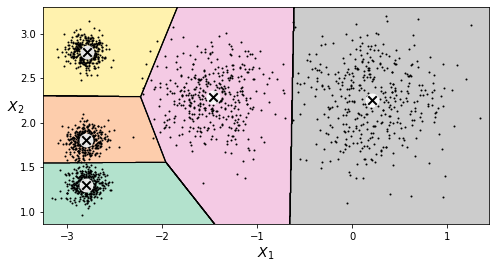

In [49]:
k_means_10 = KMeans(n_init=10, n_clusters=5, init='random', random_state=2)
k_means_10.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(k_means_10, X)

In [50]:
k_means_10.inertia_, k_means_10.score(X)

(211.5985372581684, -211.5985372581684)

##### Centroid initialization methods(init=)

Instead of initialize the centroids randomly, it is prefer to initialize them using the algorithm which proposed in [2006 paper](https://goo.gl/eNUPw6) by David Arther and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset 
* Take an new centroid $c_i$, choosing an instance $\mathbf{x}_i$ with probability $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}D(\mathbf{x}_j)^2$, where $D((\mathbf{x}_i)^2)$ is the distance between instance $\mathbf{X}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances father away from already chosen centroids are much more likely to be selected as centroids
* Repeat the previous steps until all $\mathbf{k}$ centroids have been chosen



The rest of K-Means++ algorithm is just regular K-Means. With this update, the KMeans algorithm is less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for additional complexity of the initialization process

**By default,Scikit-learn set init='k-means++'**

##### Accelerated k-means(algorithm=)

The K-Mean algorithm can sometimes be accelerated by avoiding many unnecessary distance calculation: this is achieved by triangle inequality(given 3 points A, B, C, the distance AC is always such that $AC\le AB+BC$ and by keeping track of lower and upper bounds for distances between instances and centroids ([2003 paper by Charles Elkan](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) contains more detail) 

For Elkan's variant of K-Means, use algorithm='elkan', for regular K-Means use algorithm='full'. The default is 'auto', which uses the full algorithm since Scikit-learn 1.1(it uses elkan before that)

##### Mini-batch k-means
Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batch([paper here](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf) 

In [161]:
from sklearn.cluster import MiniBatchKMeans

In [163]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

211.65239850433204

Using MiniBatch along with **memmap**

In [166]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)

In [174]:
X_train, X_test= mnist.data[:60000], mnist.data[60000:]
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

In [175]:
file_name ="my_mnist.mmap"
X_memmap = np.memmap(file_name, dtype='float32', mode='write', shape=X_train.shape )
X_memmap[:] = X_train
X_memmap.flush()


In [176]:
minibatch_kmeans =MiniBatchKMeans(n_clusters=10, random_state=42, batch_size=10)
minibatch_kmeans.fit(X_memmap)
minibatch_kmeans.inertia_

154750779392.0

In [182]:
# plot the inertia ratio and training time ratio between mini_batch K-Means and regular K-Means
from timeit import timeit

In [187]:
max_k=100
inertias = np.empty((max_k,2))
times = np.empty((max_k, 2))

In [189]:
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="full", random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

1/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

2/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

3/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

4/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

5/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

6/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

7/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

8/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

9/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

10/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

11/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

12/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

13/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

14/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

15/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

16/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

17/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

18/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

19/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

20/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

21/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

22/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

23/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

24/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

25/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

26/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

27/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

28/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

29/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

30/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

31/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

32/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

33/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

34/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

35/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

36/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

37/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

38/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

39/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

40/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

41/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

42/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

43/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

44/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

45/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

46/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

47/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

48/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

49/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

50/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

51/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

52/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

53/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

54/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

55/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

56/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

57/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

58/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

59/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

60/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

61/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

62/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

63/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

64/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

65/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

66/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

67/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

68/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

69/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

70/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

71/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

72/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

73/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

74/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

75/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

76/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

77/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

78/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

79/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

80/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

81/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

82/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

83/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

84/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

85/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

86/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

87/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

88/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

89/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

90/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

91/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

92/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

93/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

94/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

95/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

96/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

97/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

98/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

99/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

100/100

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm

minibatch_kmeans_vs_kmeans_plot is saving...


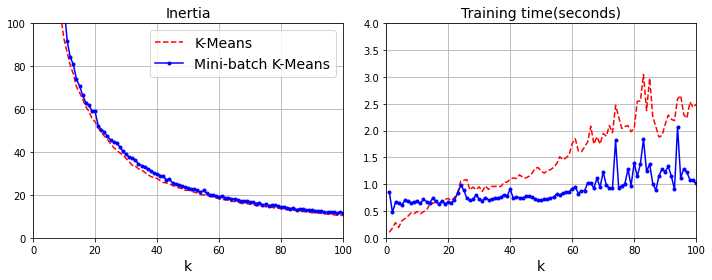

In [197]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(range(1,max_k+1),inertias[:,0],'r--', label='K-Means')
plt.plot(range(1,max_k+1),inertias[:,1],'b.-', label='Mini-batch K-Means')
plt.axis([0,100,0,100])
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('k')
plt.title('Inertia')

plt.subplot(122)
plt.plot(range(1,max_k+1),times[:,0],'r--', label='K-Means')
plt.plot(range(1,max_k+1),times[:,1],'b.-', label='Mini-batch K-Means')
plt.axis([0,max_k,0,4])
plt.grid()

plt.xlabel('k')
plt.title('Training time(seconds)')

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

##### Finding the optimal clusters(n_clusters)

bad_n_clusters_plot is saving...


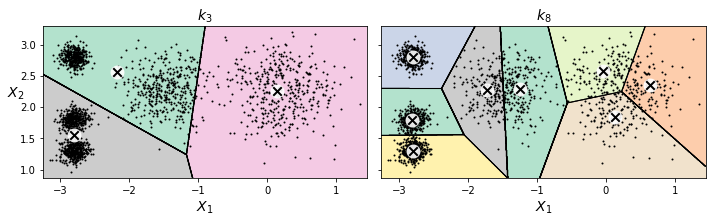

In [201]:
# see if the clusters value is set lower or greater than good cluster with 
k_means_k3 =KMeans(n_clusters=3, random_state=42)
k_means_k8 =KMeans(n_clusters=8, random_state=42)
plot_clusterer_comparison(k_means_k3, k_means_k8,X, '$k_3$', '$k_8$')
save_fig("bad_n_clusters_plot")
plt.show()

In [204]:
# The more clusters there are, the closer each instance will be to its closest centroid and therefore
# the lower inertia will be
k_means_k3.inertia_, k_means_k8.inertia_

(653.2167190021553, 119.11983416102878)

inertia_vs_k_plot is saving...


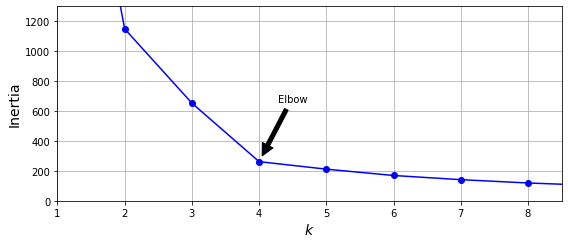

In [54]:
# plot the inertia as a function of k and analyze its result
k_means_k=[KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,11)]
inertials = [model.inertia_ for model in k_means_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,11), inertials,'bo-')
plt.annotate("", xy=[4, inertials[3]], xytext=(4.45, 650),
            arrowprops=dict(facecolor='black',shrink=0.1))
plt.text(4.5, 660, "Elbow", horizontalalignment='center')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

above Elbow is $k$=4, which means that less clusters than that would be bad. 

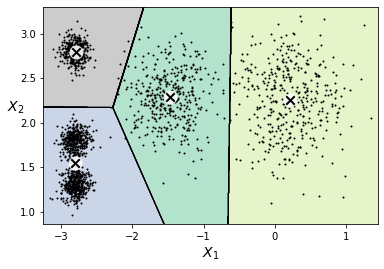

In [55]:
plot_decision_boundaries(k_means_k[4-1],X)

Another approach is to check silhouette score. silhouette coefficient s=$(b-a) / max(b,a)$
* a is the mean distance of a instance to the other distance in the same cluster(mean intra cluster distance)
* b is the mean nearest_cluster distance, that is the mean distance to the instances of next closest cluster(define as that one of the minimize b, excluding the instance's own cluster
* s is between (-1, 1). 
  * -1 means instance may assigned to the wrong cluster
  * 1 means the instance is well inside its own cluster
  * 0 means the instance is close to a cluster boundary


In [56]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

silhouette_score_vs_k_plot is saving...


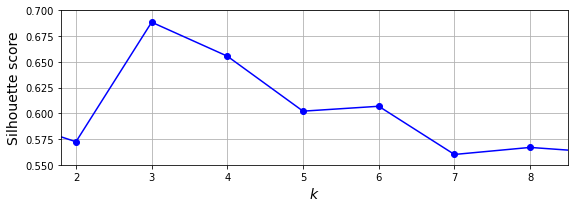

In [58]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in k_means_k[1:]]

plt.figure(figsize=(8,3))
plt.plot(range(1,10), silhouette_scores, 'bo-')
plt.grid()
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])

save_fig("silhouette_score_vs_k_plot")
plt.show()


Above plot confirm the k=4 is a very good choice, but it also outlines the fact that K=5 is quite as well

Silhouette Diagram: when plotting every instance's silhouette, we sort them by the cluster they are assigned to and by the value of coefficient.



In [59]:
    from sklearn.metrics import silhouette_samples
    from matplotlib.ticker import FixedLocator, FixedFormatter

silhouette_analysis_plot is saving...


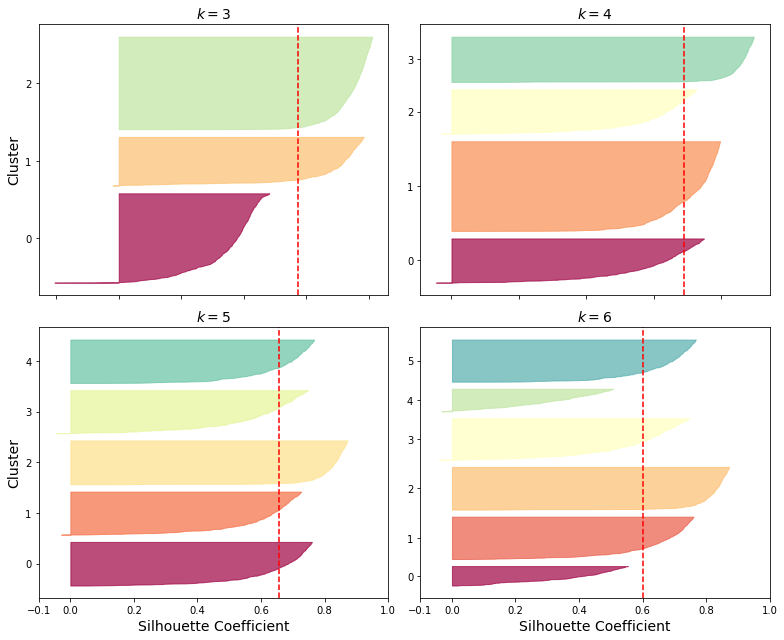

In [91]:
plt.figure(figsize=(11, 9))
for k in (3,4,5,6):
    plt.subplot(2,2, k-2)
    
    y_pred = k_means_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X)//30 # padding between each cluster
    pos = padding
    ticks = []
    
    
    for i in range(k):
        coefs = silhouette_coefficients[y_pred ==i]
        coefs.sort()
        
        color =plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos, pos+len(coefs)), 0, coefs,
                         facecolor= color, edgecolor=color, alpha=0.7)
        ticks.append(pos+len(coefs)//2)
        pos += len(coefs) + padding #each cluster's position
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel('Cluster')
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(silhouette_scores[k-2], color='red', linestyle='--')
    plt.title(f"$k={k}$")
    
save_fig("silhouette_analysis_plot")
plt.show()

As we can see, k=5 looks the best choice here, as all clusters are roughly the same size, and they all cross the dashed line, which represent mean silhouette score 

#### Limits of K-Means

bad_kmeans_plot is saving...


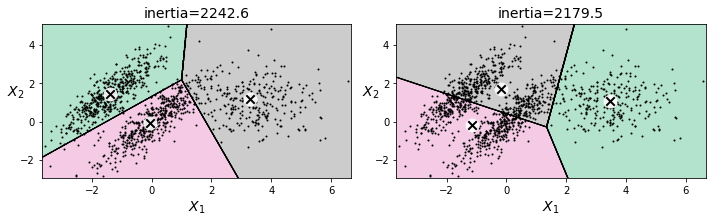

In [124]:
# For demonstration, we generate a more difficult dataset, with elongate blobs and varing densities, to see k-means'limit
# On these types of elliptical clusters, Gaussian mixture models work great
X1,y1= make_blobs(n_samples=1000, centers=((4,-4),(0,0)), random_state=42) #2 clusters with center in (4,-4) and (0,0)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]])) 
X2, y2 =  make_blobs(n_samples=250, centers=1, random_state=42)
X2 =X2 +[6,-8]
X= np.r_[X1,X2]
y = np.r_[y1,y2]

k_means_good =KMeans(n_clusters=3,
                    init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                    n_init=1, random_state=42)
k_means_bad = KMeans(n_clusters=3, random_state=42)
k_means_good.fit(X)
k_means_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(k_means_good, X)
plt.title(f"inertia={k_means_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(k_means_bad, X)
plt.title(f"inertia={k_means_bad.inertia_:.1f}")

save_fig("bad_kmeans_plot")
plt.show()

#### Using clustering for Image Segmentaion

In [125]:
# download the image from the web
import urllib.request
import PIL #python image library, we use this to load the image
                  

In [129]:
url_root="https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGE_PATH/filename
if not filepath.is_file():
    print('Downloading ', filename)
    url = f"{url_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [130]:
image = np.asarray(PIL.Image.open(filepath))
image.shape #(533, 800, 3) height, width, color(RGB)

(533, 800, 3)

In [131]:
# reshape the array to get a long list of RGB colors, then we cluster those colors using K-Means with n clusters.
# it creates a segmented_img array containing the nearest cluster center for each pixel
# lastly, it reshapes this array to the original image shape
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for i in n_colors:
    kmeans= KMeans(n_clusters=i, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    segmented_imgs.append(segmented_img)

image_segmentation_plot is saving...


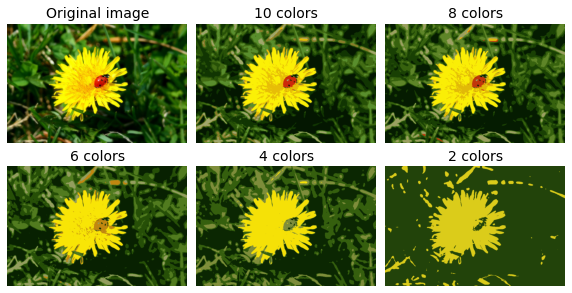

In [144]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2,3, 2+idx)
    plt.imshow(segmented_imgs[idx]/255)
    plt.title(f'{n_clusters} colors')
    plt.axis('off')
    
save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

#### Using Clustering for Semi-Supervised Learning
when we have plenty of unlabeled instances and very few labeled instances

In [145]:
# using digits dataset as example which contains 1797 grayscale 8x8 images. we will assume only the first 50 were labeled
from sklearn.datasets import  load_digits
from sklearn.linear_model import LogisticRegression

In [146]:
X_digits, y_digits = load_digits(return_X_y = True)
X_train, X_test = X_digits[:1400], X_digits[1400:]
y_train, y_test = y_digits[:1400], y_digits[1400:]

In [148]:
n_labeled =50
log_reg =LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])


LogisticRegression(max_iter=10000)

In [149]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [151]:
# check the accuracy if we were use the whole train data
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train,y_train)
log_reg_full.score(X_test,y_test)

0.906801007556675

**Improved ways:**
* Let's cluster the training set into 50 clusters, then for each cluster we try to find the image close to the centroid. We will call these image as **representative images** --This would better than random instances
* Propagated the labels to all the other instances in the same cluster
* Ignore the 1% instances that are farthest from their cluster center. these should be outliers

In [155]:
k=50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0) #identify 1-50
X_representative_digits = X_train[representative_digit_idx]

representative_images_plot is saving...


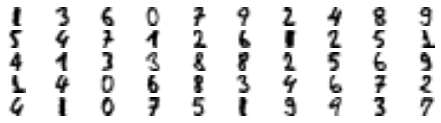

In [164]:
plt.figure(figsize=(8,2))
for idx, image in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, idx+1)
    plt.imshow(image.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
    
save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [166]:
# we manually label them
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [168]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits )
log_reg.score(X_test, y_test)

0.8488664987405542

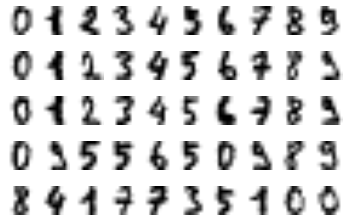

In [167]:
# The first 50 random instances
for idx, image in enumerate(X_train[:50]):
    plt.subplot(k//10, 10, idx+1)
    plt.imshow(image.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')

**Propagate the labels to all other instances of the same cluster** 

In [173]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_==i]= y_representative_digits[i]   #kmeans contains all cluster info of training data
    
log_reg= LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8942065491183879

In [174]:
len(kmeans.labels_)

1400

**Ignore the outliers(i.e. 1%)**

In [198]:
percentile_closed=99

X_cluster_distance = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = kmeans.labels_==i
    cluster_dist = X_cluster_distance[in_cluster]
    cutoff_dist = np.percentile(cluster_dist, percentile_closed)
    above_dist =(X_cluster_distance>cutoff_dist)
    X_cluster_distance[in_cluster&above_dist] =-1
    
partially_propagated = (X_cluster_distance!=-1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [199]:
log_reg =LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

A few iterations of active learning:
1. Manually label the instances that classifier is least sure about, if possible by picking them in distinct clusters
2. Train a new models with these additional labels

### DBSCAN- density-based spatial clustering of application with noise
DBSCAN defines clusters as continuous region of high density
* For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it. The region is called the instance's $\epsilon$-neighborhood
* If an instance has at least **min_samples** instances in its $\epsilon$-neighborhood(include itself), then it is considered a **core instance**. In other words, core instances are those that are located in dense regions
* All instances in the neighborhood of a core instance belong to the same cluster. The neighborhood may include other core instances; therefore, a long sequence of neighboring core distances form a single cluster
* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly

The algorithm works well if all the clusters(of all shape) are separated by low-density regions.
However, if the density varies significantly across the clusters, or there's no sufficiently low-density region around some  clusters, DBSCAN can struggle to capture all the clusters properly. Moreover, its computational complexity is roughly O($m^2$n), so it does not scale well to large datasets

In [206]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [264]:
X,y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [265]:
# instances with -1 are considered as anomalies by the algorithm
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [266]:
# The indices of the core instances
print(dbscan.core_sample_indices_[:10])
len(dbscan.core_sample_indices_),len(dbscan.labels_)

[ 0  4  5  6  7  8 10 11 12 13]


(808, 1000)

In [267]:
# Core instances themselves
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [270]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype='bool')
    core_mask[dbscan.core_sample_indices_]=True     
    anomal_mask = dbscan.labels_ ==-1
    noncore_mask = ~(core_mask|anomal_mask)
    
    cores = dbscan.components_
    X_anomal= X[anomal_mask]
    X_noncore = X[noncore_mask]
    
    plt.scatter(cores[:,0],cores[:,1], c= dbscan.labels_[core_mask],marker='o',cmap='Paired',s=size)
    plt.scatter(cores[:,0],cores[:,1], c= dbscan.labels_[core_mask],marker='*', s=20)
    plt.scatter(X_anomal[:,0],X_anomal[:,1], color= 'r',marker='x',s=100)
    plt.scatter(X_noncore[:,0],X_noncore[:,1], c= dbscan.labels_[noncore_mask], marker='^')
    
    if show_xlabels:
        plt.xlabel(f"$x_1$")
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel(f"$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    
    plt.gca().set_axisbelow(True)

dbscan_plot is saving...


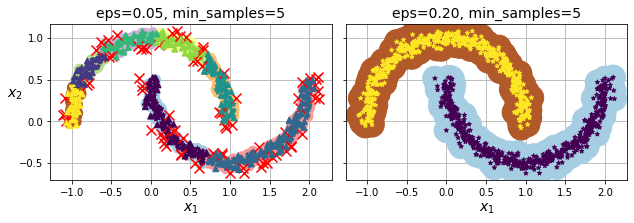

In [272]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels= False)

save_fig("dbscan_plot")
plt.show()

As the we widen each instance's neighborhood by increasing eps value, the above result seems better

In [273]:
dbscan = dbscan2

In [275]:
# DBSCAN class do not have predict, but we could use KNN with DMSCAN result to do the cluster
from sklearn.neighbors import KNeighborsClassifier

In [278]:
knn= KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [280]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [282]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

cluster_classification_plot is saving...


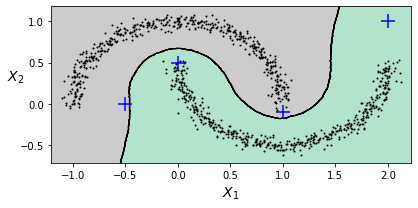

In [284]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:,0], X_new[:,1],c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [289]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

### Other Clustering Algorithms

#### Spectral Clustering

In [290]:
from sklearn.cluster import SpectralClustering

In [291]:
sc1 = SpectralClustering(n_clusters=2, gamma= 100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [294]:
sc1.affinity_matrix_.shape,sc1.affinity_matrix_.round(2)

((1000, 1000),
 array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 1. , 0.3, ..., 0. , 0. , 0. ],
        [0. , 0.3, 1. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 1. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 1. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 1. ]]))

In [296]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [316]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:,0], X[:,1], alpha=alpha, marker='o', s=size, c='grey')
    plt.scatter(X[:,0], X[:,1], c='white', marker='o', s=30)
    plt.scatter(X[:,0], X[:,1], marker='.', c=sc.labels_, cmap='Paired')
    if show_xlabels:
        plt.xlabel(f"x_1")
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel(f"x_1",rotation=0)
        
    else:
        plt.tick_params(labelleft=False)
    
    plt.title(f"RBF gamma={sc.gamma}")    
    plt.gca().set_axisbelow(True)

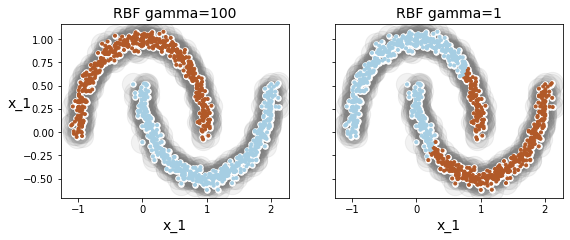

In [317]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=500, alpha=0.1,show_ylabels=False)
plt.show()

#### Agglomerative clustering

In [319]:
from sklearn.cluster import AgglomerativeClustering

In [323]:
X = np.array([0, 2, 5, 8.5]).reshape(-1,1)
agg= AgglomerativeClustering(linkage='complete').fit(X)


In [336]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator) 
             if attrib.endswith("_") and not attrib.startswith("_")]

In [337]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [340]:
agg.n_clusters_, agg.n_connected_components_

(2, 1)

## Gaussian Mixtures
This algorithm can be used for density estimation, clustering and anomaly detection
A Gaussian mixture model(**GMM**) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.
Each cluster can have a different ellipsoidal shape,size, density and orientation.

There are several GMM variants.we must know in advance the number of $k$(n_components) of Gaussian distribution. The dataset $X$ is assumed to have been generated through the following probabilistic process:
* For each instance, a cluster is picked randomly from among $k$ clusters. The probability of choosing the $j^{th}$ cluster is the cluster weight $\phi^{(j)}$. The index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$.
* if the $i^{th}$ instance was assigned to $j^{th}$ cluster(i.e., $z^{(i)} =j$), then the location of $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $\mu^{(j)}$ and covariance matrix $\sum^{(j)}$. This is noted  $x^{(i)}$ ~ $N(\mu^{(j)}, \sum^{(j)})$

This class relies on **EM**(expectation-maximization) algorithm. **EM** can end up converging to poor solution, so we need to set **n_init** and let the EM run several times and to keep only the best solution. Note, by default, n_init here is set to 1


Given the dataset $X$, we typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\sum^{(i)}$ to $\sum^{(k)}$

In [342]:
# Lets generate a dataset with 3 ellipsoids
X1, y1= make_blobs(n_samples=1000, centers=((4,-4), (0,0)), random_state=42)
X1= X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250,centers=1, random_state=42)
X2 = X2+[6,-8]
X= np.r_[X1, X2]
y= np.r_[y1, y2]

In [341]:
from sklearn.mixture import GaussianMixture

In [345]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [346]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [348]:
gm.weights_  # for three clusters are generate with 500,500 and 250 instances

array([0.20965228, 0.4000662 , 0.39028152])

In [349]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [350]:
# whether the model is converged
gm.converged_

True

In [351]:
gm.n_iter_

4

In [352]:
# predict which cluster each instance belong to(hard cluster) and the 
# probabilities it came from each cluster (soft cluster)
gm.predict(X)


array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [353]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

In [354]:
# This is a generative model, so we sample new instances from it(and get their labels)
X_new, y_new = gm.sample(6)

In [355]:
X_new,y_new

(array([[ 4.37107939, -0.20262869],
        [ 0.24631089,  2.99575196],
        [-1.10707574,  1.31527012],
        [ 0.71510659,  1.06581567],
        [-0.79010034, -1.11059504],
        [-0.45923872, -0.79202533]]),
 array([0, 1, 1, 2, 2, 2]))

In [357]:
# Estimate the density of the model at any locatoin by score_samples(). This method estimates
# the log of the probability density function(PDF) at that location
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

Let's check that the PDF integrate to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny square. then we compute approximate probability that the instances will be generated in each tiny square(by multiplying the PDF at one corner of the tiny square by the area of square) and finally summing all these probabilities, the result is very close to 1

In [377]:
resolution =100
grid = np.arange(-10, 10, 1/resolution) #2000
xx,yy = np.meshgrid(grid,grid)  #2000*2000 
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_prob=pdf*(1/resolution)**2
pdf_prob.sum()

0.9999999999217856

gaussian_mixtures_plot is saving...


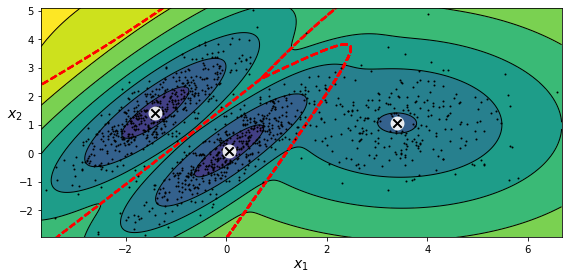

In [416]:
# plot the resulting decision boundaries and density contours
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(cluster, X, resolution=1000, show_xlabel=True, show_ylabel=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0],resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    X_full = np.c_[xx.ravel(),yy.ravel()]
    
#plot pdf area(density contour)
    Z = cluster.score_samples(X_full)
    Z= -Z.reshape(xx.shape)
    
    plt.contourf(xx, yy,Z,
                norm = LogNorm(vmin=1.0, vmax=30),
                levels = np.logspace(0,2,12))
    plt.contour(xx, yy,Z,
            norm = LogNorm(vmin=1.0, vmax=30),
            levels = np.logspace(0,2,12),
               linewidths=1, colors='k' )
#  plot decision boundary
    Z = cluster.predict(X_full)
    Z= Z.reshape(xx.shape)
    plt.contour(xx, yy,Z,linewidths=2, colors='r', linestyles='dashed' )
    
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)
    plot_centroids(cluster.means_, cluster.weights_ )
    
    if show_xlabel:
        plt.xlabel(f"$x_1$")
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabel:
        plt.ylabel(f"$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

When there are many clusters, or many dimensions, or few instances, EM can struggle to converge to the optimal solution. We might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do  this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices with set the **covariance_type** to the following:
* "spherical", all clusters must be spherical, but they can have different diameters (i.e. different variances)
* "diag", cluster can take on any ellipsoidal shape of any size, but ellipsoidal axes must be parallel to the axes(i.e., covariance matrices must be diagonal)
* "tied", all clusters must have the same shape, which can be any ellipsoid(i.e. they all share the same covariance matrix)
* "full"(default), no constraint, all clusters can take on any ellipsoidal shape of any size 

In [407]:
gm_full = GaussianMixture(n_init=10, n_components=3, covariance_type='full', random_state=42)
gm_diag = GaussianMixture(n_init=10, n_components=3, covariance_type='diag', random_state=42)
gm_tied = GaussianMixture(n_init=10, n_components=3, covariance_type='tied', random_state=42)
gm_spherical = GaussianMixture(n_init=10, n_components=3, covariance_type='spherical', random_state=42)

gm_full.fit(X)
gm_diag.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)


GaussianMixture(covariance_type='spherical', n_components=3, n_init=10,
                random_state=42)

In [418]:
def compare_gaussian_mixtures(gm1, gm2,X):
    plt.figure(figsize=(9, 4))
    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f"convariance_type='{gm1.covariance_type}'")
    
    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabel=False)
    plt.title(f"convariance_type='{gm2.covariance_type}'")


covariance_type_plot is saving...


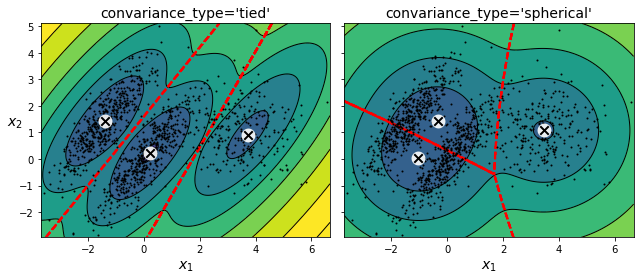

In [419]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
save_fig("covariance_type_plot")
plt.show()

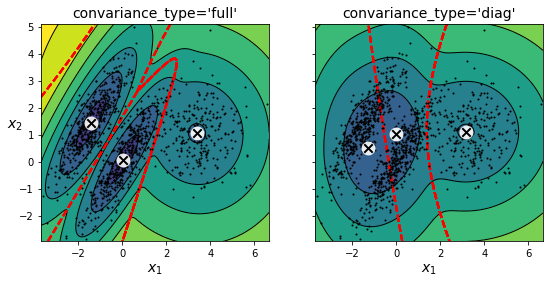

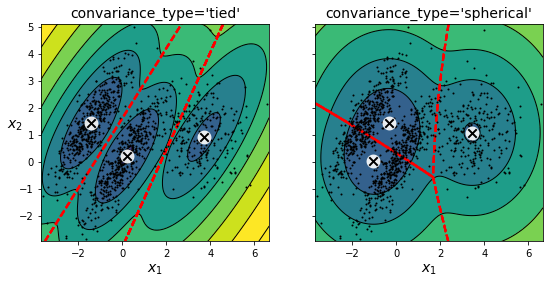

In [421]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

### Anomaly Detection Using Gaussian Mixture
Gaussian Mixture can be used for *anomaly detection*: instance located in low-density regions can be considered anomalies. We must define what threshold we want to use.E.g., a manufacturing company that tried to detect defective products. The detective product ratio is usually well-known. Say it is equal to 2%. then you can set density threshold to be the value that results in having 2% of the instances located in areas below that threshold density

When using GM to detect outliers of a dataset, we can either try to fit the GM model once to detect and remove the most extreme outliers, then fit the model again on the clean-up dataset. Another approach is to use robust covariance estimation methods(see **EllipticEnvelope** class)

In [424]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities<density_threshold]

mixture_anomaly_detection_plot is saving...


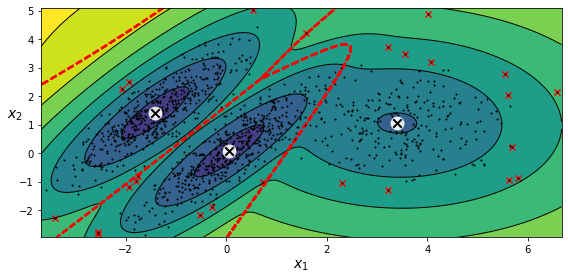

In [432]:
plt.figure(figsize=(8,4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:,0], anomalies[:,1],color='r', marker='x')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

### Selecting the number of Clusters(n_components)
Inertia or the silhouette score are good for spherical shape or have the same sizes. For Gaussian Mixture, we can try to find model that minimize a theoretical information criterion Such as the Bayesian information criterion(BIC) or the Akaike information criterion(AIC):

${BIC} = {\log(m)p - 2 \log({\hat L})}$  

${AIC} = 2p -2 log(\hat{L}$  
* $m$ is the number of instances
* $p$ is the number of parameters learned by the model
* $\hat L$ is the maximized value of likelihood function of the model. This is the conditional probability of the observed data $\mathbf{x}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn(e.g., more clusters) and reward models that fit the data well(i.e. models that give a high likelihood to the observe data)

In [433]:
gm.bic(X)

8189.74345832983

In [434]:
gm.aic(X)

8102.518178214792


There's one weight per cluster, but the weight must sum to 1,so we have one degree of freedom less, hence the -1, Similarly, 
the degrees of freedom for $n \times n$ covariance matrix is not $n^2$ but $1 + 2 +\dots +n =\dfrac{n(n+1)}{2}$.

In [438]:
# manually calculate the BIC
n_clusters =3
n_dimentions =2
n_param_for_weights = n_clusters-1
n_param_for_means = n_dimentions * n_clusters
n_param_for_cov = n_clusters * n_dimentions*(n_dimentions+1)//2
n_params = n_param_for_cov + n_param_for_means + n_param_for_weights
maximum_likelihood = gm.score(X) * len(X)
bic = np.log(len(X)) * n_params - 2*maximum_likelihood
aic = 2* n_params -2*maximum_likelihood
bic, aic

(8189.74345832983, 8102.518178214792)

Train GM with different K and their BIC


aic_bic_vs_k_plot is saving...


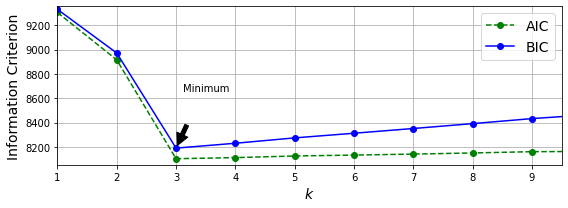

In [451]:
gms_per_k =[GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1,11)]
aic_per_k = [model.aic(X) for model in gms_per_k]
bic_per_k = [model.bic(X) for model in gms_per_k]

plt.figure(figsize=(8,3))
plt.plot(range(1,11), aic_per_k,"go--", label="AIC")
plt.plot(range(1,11), bic_per_k,"bo-", label="BIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1,9.5, min(aic_per_k)-50, max(aic_per_k)+50])
plt.annotate("", xy=(3, bic_per_k[2]), xytext=(3.2, 8400),
            arrowprops= dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.grid()
plt.legend(loc='upper right')

save_fig("aic_bic_vs_k_plot")
plt.show()

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, it is possible to use the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters, Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically

In [452]:
from sklearn.mixture import BayesianGaussianMixture

In [455]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

The algorithm automatically detected that only 3 clusters are needed

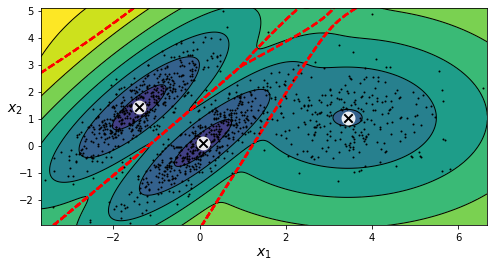

In [456]:
# plot the result
plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm,X)
plt.show()

In [ ]:
# Gaussian mixture work greate on clusters with ellipsoidal shape,but they don't do well with clusters of very different shape
# we using moon shape as a example
X_moons, y_moons = make_moons(n_samples= 1000, noise=0.05, random_state=42)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

moons_vs_bgm_plot is saving...


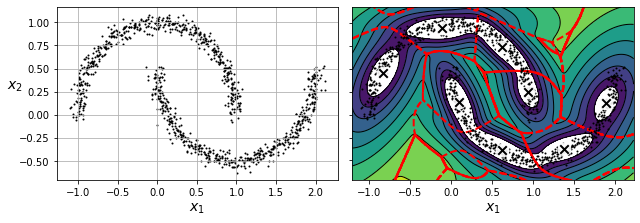

In [467]:
plt.figure(figsize=(9,3.2))
plt.subplot(121)
plt.scatter(X_moons[:,0], X_moons[:,1], color='black',s=1 )
plt.grid()
plt.xlabel(f"$x_1$")
plt.ylabel(f"$x_2$", rotation =0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabel=False)
save_fig("moons_vs_bgm_plot")

plt.show()

The algorithm detected 8 clusters instead of 2.but since its density  plot does not look bad, it might usable for anomaly detection.

## Cluster the Olivetti Faces Dataset
The classic Olivetti faces dataset contains 400 gray scale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function.

### cluster 

In [134]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [19]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [15]:
# since the dataset is quite small, we use stratified sampling to 
# ensure there the same number of images per person in each set

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

In [137]:
sss=StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=40)
train_valid_idx, test_idx = next(sss.split(olivetti.data, olivetti.target))

In [138]:
X_train_valid, X_test= olivetti.data[train_valid_idx], olivetti.data[test_idx]
y_train_valid, y_test= olivetti.target[train_valid_idx], olivetti.target[test_idx]

sss = StratifiedShuffleSplit(n_splits=1, random_state=43, test_size=80)
train_idx,valid_idx = next(sss.split(X_train_valid, y_train_valid))
X_train, X_valid = X_train_valid[train_idx], X_train_valid[valid_idx]
y_train, y_valid = y_train_valid[train_idx], y_train_valid[valid_idx]
X_train.shape, X_valid.shape, X_test.shape

((280, 4096), (80, 4096), (40, 4096))

In [139]:
y_train.shape, y_valid.shape, y_test.shape

((280,), (80,), (40,))

For speeding up this, we use PCA to decrease the dimension

In [140]:
from sklearn.decomposition import PCA

In [141]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

Using K-Means to cluster the images. we will use silhouette score to identify the number of clusters 

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [143]:
kmeans_per_k=[]

clusters=[]
for k  in range(5,150,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)
    clusters.append(k)
    


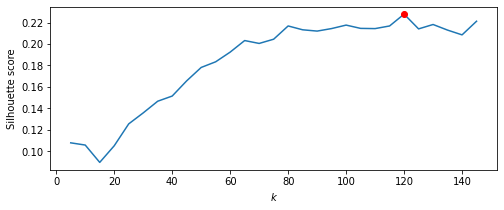

In [144]:
silhouette_scores= [silhouette_score(X_train_pca, kmeans.labels_) for kmeans in kmeans_per_k]
best_silhouette_index = np.argmax(silhouette_scores)
best_cluster = clusters[best_silhouette_index]
best_silhouette = silhouette_scores[best_silhouette_index]

plt.figure(figsize=(8, 3))
plt.plot(clusters,silhouette_scores)
plt.plot(best_cluster, best_silhouette,'ro')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

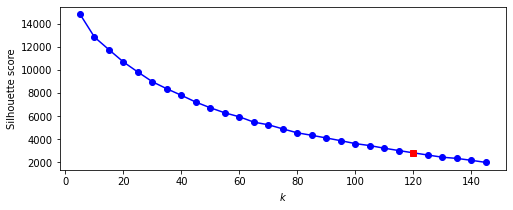

In [145]:
inertia = [kmeans.inertia_ for kmeans in kmeans_per_k]
best_inertia=inertia[best_silhouette_index]
plt.figure(figsize=(8, 3))
plt.plot(clusters,inertial, 'bo-')
plt.plot(best_cluster,best_inertia ,'rs')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()
# The optimal number of clusters is not clear on this inertia diagram, 
# as there is no obvious elbow, so let's stick with k=120.

In [93]:

best_model = kmeans_per_k[best_silhouette_index]

In [146]:
# Visuliaze the clusters
def plot_face(faces, labels,ncols=5):
    faces=faces.reshape(-1, 64,64)
    nrows = (len(faces)-1)//5+1    

    for i,(face, label) in enumerate(zip(faces,labels)):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(face, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.show()
        

cluster: 0


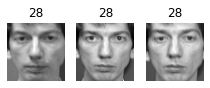

cluster: 1


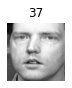

cluster: 2


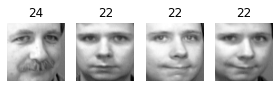

cluster: 3


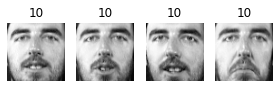

cluster: 4


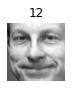

cluster: 5


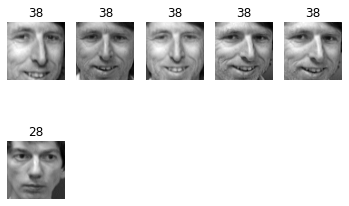

cluster: 6


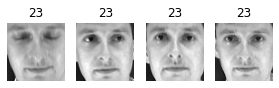

cluster: 7


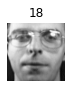

cluster: 8


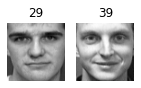

cluster: 9


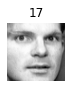

cluster: 10


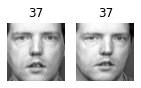

cluster: 11


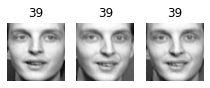

cluster: 12


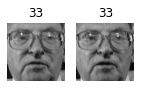

cluster: 13


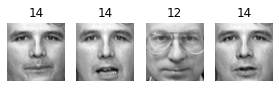

cluster: 14


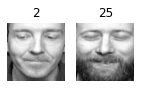

cluster: 15


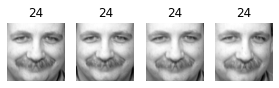

cluster: 16


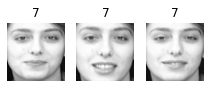

cluster: 17


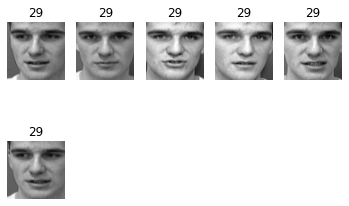

cluster: 18


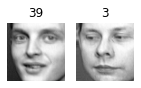

cluster: 19


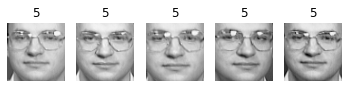

cluster: 20


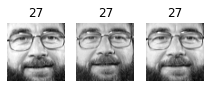

cluster: 21


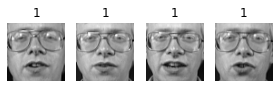

cluster: 22


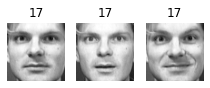

cluster: 23


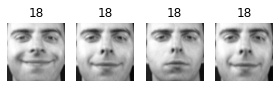

cluster: 24


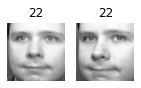

cluster: 25


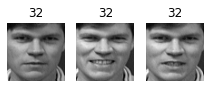

cluster: 26


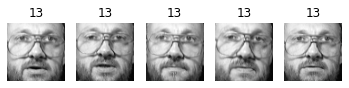

cluster: 27


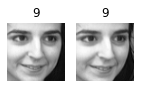

cluster: 28


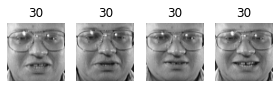

cluster: 29


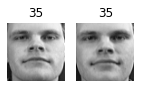

cluster: 30


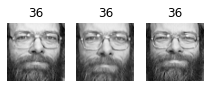

cluster: 31


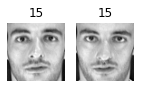

cluster: 32


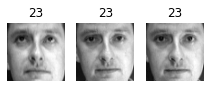

cluster: 33


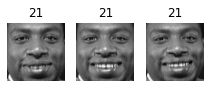

cluster: 34


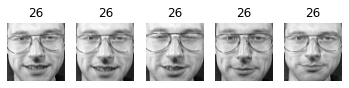

cluster: 35


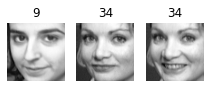

cluster: 36


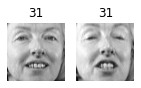

cluster: 37


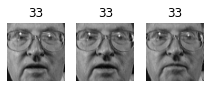

cluster: 38


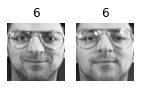

cluster: 39


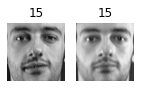

cluster: 40


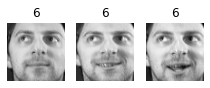

cluster: 41


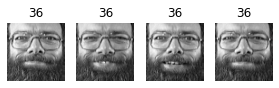

cluster: 42


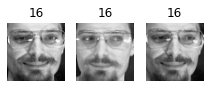

cluster: 43


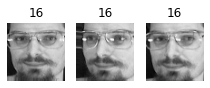

cluster: 44


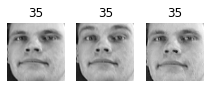

cluster: 45


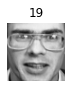

cluster: 46


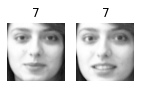

cluster: 47


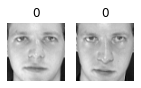

cluster: 48


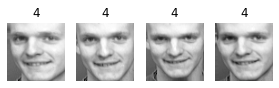

cluster: 49


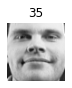

cluster: 50


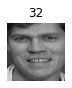

cluster: 51


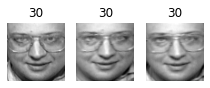

cluster: 52


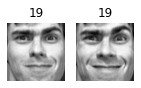

cluster: 53


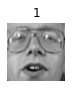

cluster: 54


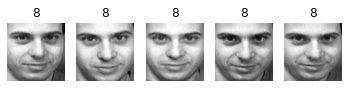

cluster: 55


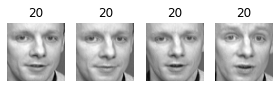

cluster: 56


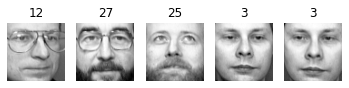

cluster: 57


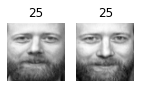

cluster: 58


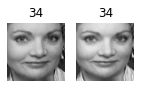

cluster: 59


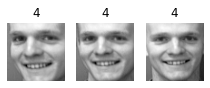

cluster: 60


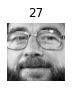

cluster: 61


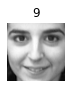

cluster: 62


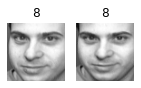

cluster: 63


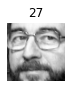

cluster: 64


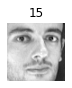

cluster: 65


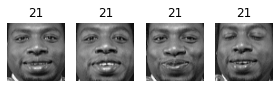

cluster: 66


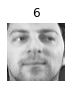

cluster: 67


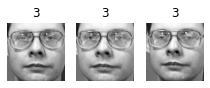

cluster: 68


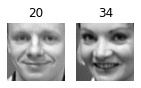

cluster: 69


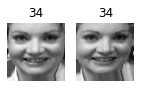

cluster: 70


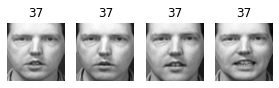

cluster: 71


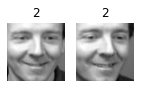

cluster: 72


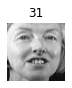

cluster: 73


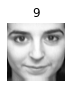

cluster: 74


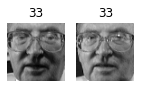

cluster: 75


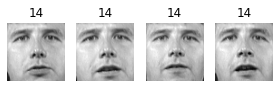

cluster: 76


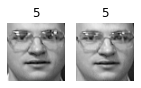

cluster: 77


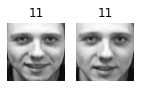

cluster: 78


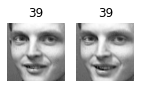

cluster: 79


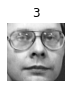

cluster: 80


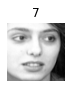

cluster: 81


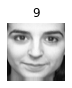

cluster: 82


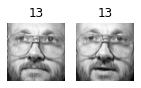

cluster: 83


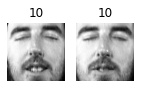

cluster: 84


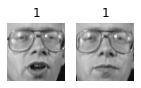

cluster: 85


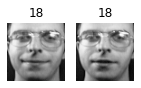

cluster: 86


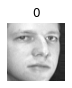

cluster: 87


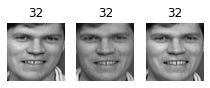

cluster: 88


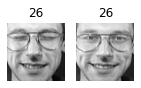

cluster: 89


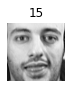

cluster: 90


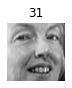

cluster: 91


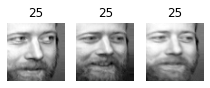

cluster: 92


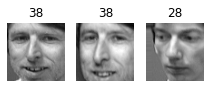

cluster: 93


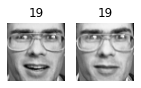

cluster: 94


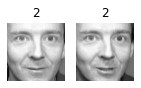

cluster: 95


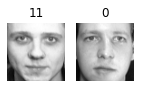

cluster: 96


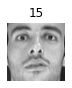

cluster: 97


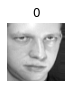

cluster: 98


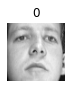

cluster: 99


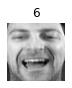

cluster: 100


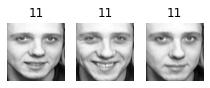

cluster: 101


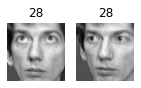

cluster: 102


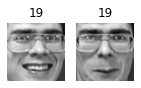

cluster: 103


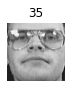

cluster: 104


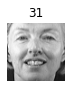

cluster: 105


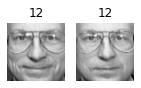

cluster: 106


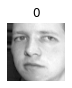

cluster: 107


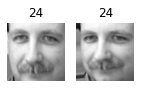

cluster: 108


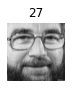

cluster: 109


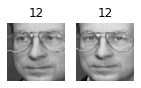

cluster: 110


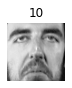

cluster: 111


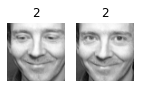

cluster: 112


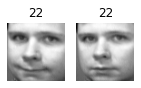

cluster: 113


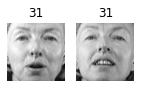

cluster: 114


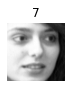

cluster: 115


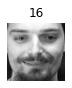

cluster: 116


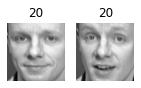

cluster: 117


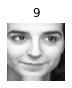

cluster: 118


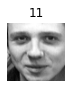

cluster: 119


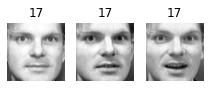

In [147]:
for cluster_id in np.unique(best_model.labels_):
    print("cluster:", cluster_id)
    incluster = best_model.labels_==cluster_id
    faces= X_train[incluster]
    labels= y_train[incluster]
    plot_face(faces,labels)

Train a classifier to predict which person is represented in each picture and evaluate in validation dataset

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc =RandomForestClassifier(n_estimators=150, random_state=42)
rfc.fit(X_train_pca,y_train)
rfc.score(X_valid_pca,y_valid)

0.9

In [150]:
# use the kmeans as a dimensionality reduction tool and train a classifier on the reduced set

In [151]:
X_train_reduction= best_model.transform(X_train_pca)
X_valid_reduction= best_model.transform(X_valid_pca)
X_test_reduction= best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduction, y_train)
clf.score(X_valid_reduction, y_valid)

0.7

Using gridsearch to search for the number of clusters that allows the classifier to get the best performance

In [152]:
from sklearn.pipeline import make_pipeline

In [153]:
k_range= range(5,150,5)
for clusters in k_range:
    pipe = make_pipeline(
        KMeans(n_clusters=clusters, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipe.fit(X_train_pca,y_train)
    print(clusters, pipe.score(X_valid_pca, y_valid))

5 0.3875
10 0.575
15 0.6
20 0.6625
25 0.6625
30 0.6625
35 0.675
40 0.75
45 0.7375
50 0.725
55 0.7125
60 0.7125
65 0.7375
70 0.7375
75 0.7375
80 0.7875
85 0.7625
90 0.75
95 0.7125
100 0.775
105 0.75
110 0.725
115 0.7625
120 0.7
125 0.75
130 0.725
135 0.7375
140 0.7625
145 0.6875


What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [127]:
X_train_more=np.c_[X_train_pca, X_train_reduction]
X_valid_more=np.c_[X_valid_pca, X_valid_reduction]

for clusters in k_range:
    pipe= make_pipeline(
        KMeans(n_clusters= clusters, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
        
    )
    pipe.fit(X_train_more, y_train)
    print(clusters, pipe.score(X_valid_more, y_valid))

5 0.275
10 0.3875
15 0.4125
20 0.4875
25 0.4625
30 0.475
35 0.5
40 0.5
45 0.55
50 0.4625
55 0.5375
60 0.5625
65 0.575
70 0.6
75 0.55
80 0.6375
85 0.5875
90 0.6
95 0.6
100 0.55
105 0.6
110 0.575
115 0.5625
120 0.5375
125 0.6125
130 0.5875
135 0.625
140 0.6375
145 0.5875


In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_more, y_train)
clf.score(X_valid_more, y_valid)

hat's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

### Train a Gaussian mixture model 
To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

In [ ]:
from sklearn.mixture import GaussianMixture


In [154]:
gm=GaussianMixture(n_components=40, n_init=10)
y_pred = gm.fit_predict(X_train_pca)

Using the model to generate some new faces with sample and plot them

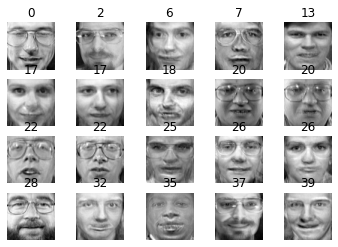

In [155]:
new_face_num=20
new_faces_reduced, y_gen_faces= gm.sample(new_face_num)
new_faces=pca.inverse_transform(new_faces_reduced)

plot_face(new_faces, y_gen_faces)

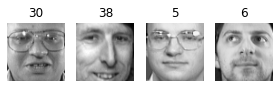

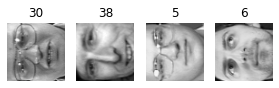

In [187]:
# modify some images(rotate, flip,dacken)
# rotate: reshape to 64x64 and then change the x,y value
rotate_number=4
rotated = np.transpose(X_train[:rotate_number].reshape(-1,64,64), axes=[0,2,1])

y_rotated= y_train[:rotate_number]
plot_face(X_train[:rotate_number], y_rotated)
plot_face(rotated, y_rotated)

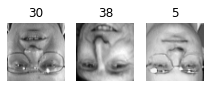

In [189]:
# flip: a[::-1] reverse the content in a
flip_number=3
flipped= X_train[:flip_number][:,::-1]
flipped= flipped.reshape(-1,64,64)
y_flipped= y_train[:flip_number]
plot_face(flipped,y_flipped )

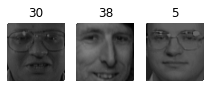

In [185]:
# darken
darkened_number=3
darkened = X_train[:darkened_number].copy()
darkened[:,1:-1] *= 0.3
darkened = darkened.reshape(-1,64,64)
y_darkened = y_train[:darkened_number]
plot_face(darkened,y_darkened )

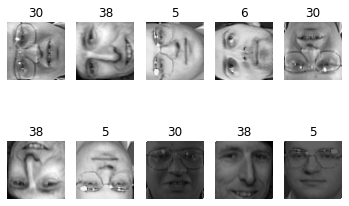

In [190]:
modified = np.r_[rotated,flipped,darkened]
y_modified = np.r_[y_rotated, y_flipped, y_darkened]
plot_face(modified, y_modified)

In [196]:
# check whether the gaussian mixture model can identify the anomality by using score_sample
modified= modified.reshape(-1, 64*64)
X_modified_pca= pca.transform(modified)
gm.score_samples(X_modified_pca)

array([-2.39635606e+07, -2.02436547e+07, -4.15206353e+07, -4.95032516e+07,
       -3.69613063e+07, -1.83376397e+07, -3.23754815e+07, -1.06179088e+08,
       -1.18833592e+08, -6.91251824e+07])

In [200]:
gm.score_samples(X_train_pca)[:10]

array([1163.02020912, 1134.42422543, 1156.32132891, 1170.67602861,
       1125.14519628, 1140.70885985, 1096.517735  , 1110.00598273,
       1098.19185807, 1097.69264439])

### Dimensionality reduction techniques for anomaly detection

In [207]:
def reconstruction_errors(pca, X):
    '''
    Calculate the reduction errors
    '''
    X_pca = pca.transform(X)
    X_recons = pca.inverse_transform(X_pca)
    error = np.square(X-X_recons).mean(axis=-1)
    return error

In [209]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [210]:
reconstruction_errors(pca, modified).mean()

0.004703625

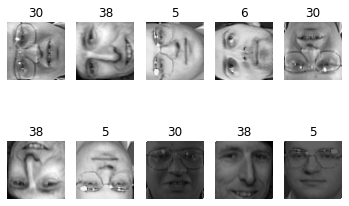

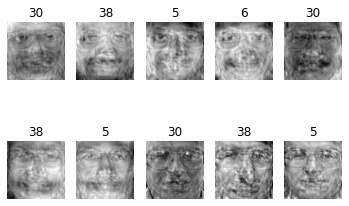

In [213]:
# Let's look at what modified images looks like after their reconstruction after pca
modified_recons= pca.inverse_transform(X_modified_pca)
plot_face(modified,y_modified)
plot_face(modified_recons, y_modified)